In [135]:
# Set the process name to be human readable in htop
import setproctitle
setproctitle.setproctitle("Prep_Figure_S2")

import requests
import pandas as pd
pd.options.display.max_columns = 999

import numpy as np
import helper as my

import glob
import os
import sys

from tqdm import tqdm, tqdm_notebook
from tqdm._tqdm_notebook import tqdm_notebook

tqdm.pandas(tqdm_notebook)
tqdm_notebook.pandas()


%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt

from collections import defaultdict
import math

In [136]:
eclair_preds = pd.concat([pd.read_csv(f, sep="\t") for f in glob.glob("../../Data/Eclair_Predictions/*")])

In [137]:
clf_use_viral = defaultdict(int)
clf_use_viral.update(eclair_preds[eclair_preds["Prot"] == 0].sort_values(["P1", "P2", "TopClf"], ascending=False).drop_duplicates(["P1", "P2"])["TopClf"].value_counts())

clf_use_human = defaultdict(int)
clf_use_human.update(eclair_preds[eclair_preds["Prot"] == 1].sort_values(["P1", "P2", "TopClf"], ascending=False).drop_duplicates(["P1", "P2"])["TopClf"].value_counts())

clf_use_human_human = dict(zip(range(1, 9), np.random.randint(0, 100, 8)))

In [138]:
all_preds = glob.glob("[REDACTED_PATH]/eclair/features/per_interaction/*.pkl")

In [139]:
human_unis = set(pd.read_csv("[REDACTED_PATH]/uniprot/parsed_files/uniprot_human2aaseq.txt", sep="\t", header=None)[0].to_list())

In [140]:
human_inters = set(pd.read_csv("../../H_sapiens_interfacesALL.txt", sep="\t")[["P1", "P2"]].apply(lambda x: tuple(sorted(x)), axis=1).values)

In [141]:
len(human_unis)

20365

In [142]:
keep = []

for p in all_preds:
    uni1, uni2 = os.path.basename(p).split("_")[:2]
    if(uni1 in human_unis and uni2 in human_unis and tuple(sorted([uni1, uni2])) in human_inters):
        keep.append((uni1, uni2))

In [143]:
pd.DataFrame(set(keep)).to_csv("Predicted_Human_Interactions.txt", sep="\t", header=None, index=None)

In [144]:
#os.system("mkdir [REDACTED_PATH]Collaborators/Lab_Member_Requests/Charles/2020_05_04_COVID19_Website/Figures/Supplemental_Figure_2/Human_Predictions")

In [145]:
#os.system("eclair -f [REDACTED_PATH]Collaborators/Lab_Member_Requests/Charles/2020_05_04_COVID19_Website/Figures/Supplemental_Figure_2/Predicted_Human_Interactions.txt -nc 10 -predpath [REDACTED_PATH]Collaborators/Lab_Member_Requests/Charles/2020_05_04_COVID19_Website/Figures/Supplemental_Figure_2/Human_Predictions --step 8")

In [146]:
all_eclair_preds = pd.concat([pd.read_pickle(f) for f in glob.glob("Human_Predictions/*")])

In [147]:
clf_use_human_human = defaultdict(int)
clf_use_human_human.update(all_eclair_preds.sort_values(["P1", "P2", "Prot", "TopClf"], ascending=False).drop_duplicates(["P1", "P2", "Prot"])["TopClf"].value_counts())

In [34]:
os.path.abspath("Predicted_Human_Interactions.txt")

'[REDACTED_PATH]Collaborators/Lab_Member_Requests/Charles/2020_05_04_COVID19_Website/Figures/Supplemental_Figure_2/Predicted_Human_Interactions.txt'

In [148]:
print len(all_eclair_preds)

695054


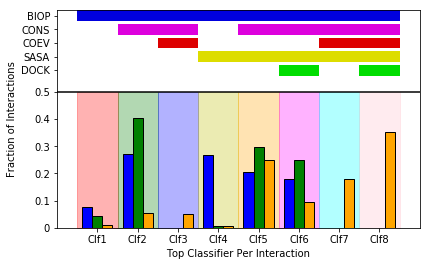

In [149]:
plt.figure(figsize=(6.5, 4))
colors = ["r", "g", "b", "y", "orange", "magenta", "cyan", "pink"]
for i in range(1, 9):
    plt.fill_between([i-0.5, i+0.5], 0.5, color=colors[i-1], alpha=0.3)
    plt.bar(i - 0.25, clf_use_viral[i] / float(sum(clf_use_viral.values())), width=0.25, color="blue", edgecolor="k")
    plt.bar(i, clf_use_human[i] / float(sum(clf_use_human.values())), width=0.25, color="green", edgecolor="k")
    plt.bar(i + 0.25, clf_use_human_human[i] / float(sum(clf_use_human_human.values())), width=0.25, color="orange", edgecolor="k")
colors = ["#0000DD", "#DD00DD", "#DD0000", "#DDDD00", "#00DD00"]
uses = [[1, 1, 1, 1, 1, 1, 1, 1], [0, 1, 1, 0, 1, 1, 1, 1], [0, 0, 1, 0, 0, 0, 1, 1], [0, 0, 0, 1, 1, 1, 1, 1], [0, 0, 0, 0, 0, 1, 0, 1]]
y = 0.8 - 0.02
j = 0
ticks = [0, 0.1, 0.2, 0.3, 0.4, 0.5]
tick_labels = [0, 0.1, 0.2, 0.3, 0.4, 0.5]
for u in uses:
    for i in range(1, 9):
        if(u[i-1] == 1):
            plt.barh(y, left=i-0.5, width=1, height=0.04, color=colors[j])
    ticks.append(y)
    y -= 0.05
    j += 1
tick_labels += ["BIOP", "CONS", "COEV", "SASA", "DOCK"]
plt.ylim(0, 0.8)
plt.xlim(0, 9)
plt.yticks(ticks, tick_labels)
plt.xticks(range(1, 9), ["Clf1", "Clf2", "Clf3", "Clf4", "Clf5", "Clf6", "Clf7", "Clf8"])
plt.ylabel("Fraction of Interactions")
plt.xlabel("Top Classifier Per Interaction")
plt.axhline(0.5, color="k")
plt.savefig("a1.svg")

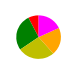

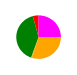

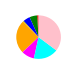

In [165]:
plt.figure(figsize=(1, 1))
colors = ["r", "g", "b", "y", "orange", "magenta", "cyan", "pink"]
plt.pie([clf_use_viral[i] for i in range(1, 9)], colors=colors, startangle=90)
plt.savefig("a2.svg")
plt.show()
plt.figure(figsize=(1, 1))
colors = ["r", "g", "b", "y", "orange", "magenta", "cyan", "pink"]
plt.pie([clf_use_human[i] for i in range(1, 9)], colors=colors, startangle=90)
plt.savefig("a3.svg")
plt.show()
plt.figure(figsize=(1, 1))
colors = ["r", "g", "b", "y", "orange", "magenta", "cyan", "pink"]
plt.pie([clf_use_human_human[i] for i in range(1, 9)], colors=colors, startangle=90)
plt.savefig("a4.svg")
plt.show()

In [151]:
clf_use_per_res_viral = defaultdict(int)
clf_use_per_res_viral.update(eclair_preds[eclair_preds["Prot"] == 0]["TopClf"].value_counts())

clf_use_per_res_human = defaultdict(int)
clf_use_per_res_human.update(eclair_preds[eclair_preds["Prot"] == 1]["TopClf"].value_counts())

clf_use_per_res_human_human = defaultdict(int)
clf_use_per_res_human_human.update(all_eclair_preds["TopClf"].value_counts())

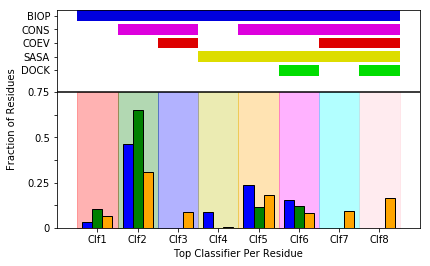

In [152]:
plt.figure(figsize=(6.5, 4))
colors = ["r", "g", "b", "y", "orange", "magenta", "cyan", "pink"]
for i in range(1, 9):
    plt.fill_between([i-0.5, i+0.5], 0.75, color=colors[i-1], alpha=0.3)
    plt.bar(i - 0.25, clf_use_per_res_viral[i] / float(sum(clf_use_per_res_viral.values())), width=0.25, color="blue", edgecolor="k")
    plt.bar(i, clf_use_per_res_human[i] / float(sum(clf_use_per_res_human.values())), width=0.25, color="green", edgecolor="k")
    plt.bar(i + 0.25, clf_use_per_res_human_human[i] / float(sum(clf_use_per_res_human_human.values())), width=0.25, color="orange", edgecolor="k")
colors = ["#0000DD", "#DD00DD", "#DD0000", "#DDDD00", "#00DD00"]
uses = [[1, 1, 1, 1, 1, 1, 1, 1], [0, 1, 1, 0, 1, 1, 1, 1], [0, 0, 1, 0, 0, 0, 1, 1], [0, 0, 0, 1, 1, 1, 1, 1], [0, 0, 0, 0, 0, 1, 0, 1]]
y = 0.75*1.6 - 0.02*3/2
j = 0
ticks = [0, 0.125, 0.25, 0.375, 0.5, 0.625, 0.75]
tick_labels = [0, "", 0.25, "", 0.5, "", 0.75]
for u in uses:
    for i in range(1, 9):
        if(u[i-1] == 1):
            plt.barh(y, left=i-0.5, width=1, height=0.04*3/2, color=colors[j])
    ticks.append(y)
    y -= 0.05*3/2
    j += 1
tick_labels += ["BIOP", "CONS", "COEV", "SASA", "DOCK"]
plt.ylim(0, 0.75*1.6)
plt.xlim(0, 9)
plt.yticks(ticks, tick_labels)
plt.xticks(range(1, 9), ["Clf1", "Clf2", "Clf3", "Clf4", "Clf5", "Clf6", "Clf7", "Clf8"])
plt.ylabel("Fraction of Residues")
plt.xlabel("Top Classifier Per Residue")
plt.axhline(0.75, color="k")
plt.savefig("b1.svg")

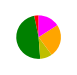

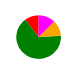

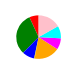

In [164]:
plt.figure(figsize=(1, 1))
colors = ["r", "g", "b", "y", "orange", "magenta", "cyan", "pink"]
plt.pie([clf_use_per_res_viral[i] for i in range(1, 9)], colors=colors, startangle=90)
plt.savefig("b2.svg")
plt.show()
plt.figure(figsize=(1, 1))
colors = ["r", "g", "b", "y", "orange", "magenta", "cyan", "pink"]
plt.pie([clf_use_per_res_human[i] for i in range(1, 9)], colors=colors, startangle=90)
plt.savefig("b3.svg")
plt.show()
plt.figure(figsize=(1, 1))
colors = ["r", "g", "b", "y", "orange", "magenta", "cyan", "pink"]
plt.pie([clf_use_per_res_human_human[i] for i in range(1, 9)], colors=colors, startangle=90)
plt.savefig("b4.svg")
plt.show()

In [154]:
import seaborn as sn

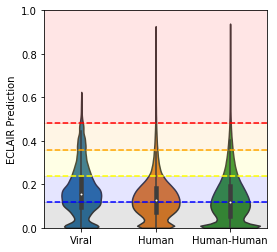

In [155]:
plt.figure(figsize=(4, 4))
viral_preds = eclair_preds[eclair_preds["Prot"] == 0]["Pred"].values
human_preds = eclair_preds[eclair_preds["Prot"] == 1]["Pred"].values
human_human_preds = all_eclair_preds["Pred"].values
sn.violinplot(data=[viral_preds, human_preds, human_human_preds], cut=0)
plt.fill_between([-1, 3], [0.12, 0.12], y2=0, color="k", alpha=0.1)
plt.fill_between([-1, 3], [0.24, 0.24], y2=0.12, color="blue", alpha=0.1)
plt.fill_between([-1, 3], [0.36, 0.36], y2=0.24, color="yellow", alpha=0.1)
plt.fill_between([-1, 3], [0.48, 0.48], y2=0.36, color="orange", alpha=0.1)
plt.fill_between([-1, 3], [1, 1], y2=0.48, color="red", alpha=0.1)
plt.plot([-1, 3], [0.12, 0.12], color="blue", linestyle="--")
plt.plot([-1, 3], [0.24, 0.24], color="yellow", linestyle="--")
plt.plot([-1, 3], [0.36, 0.36], color="orange", linestyle="--")
plt.plot([-1, 3], [0.48, 0.48], color="red", linestyle="--")
plt.xticks([0, 1, 2], ["Viral", "Human", "Human-Human"])
plt.ylim(0, 1)
plt.ylabel("ECLAIR Prediction")
plt.savefig("c.svg")

In [156]:
import scipy
print scipy.stats.ks_2samp(viral_preds, human_preds)
print scipy.stats.ks_2samp(human_human_preds, human_preds)
print scipy.stats.ks_2samp(viral_preds, human_human_preds)

Ks_2sampResult(statistic=0.14164120821502946, pvalue=0.0)
Ks_2sampResult(statistic=0.072722590163282169, pvalue=0.0)
Ks_2sampResult(statistic=0.14863883824285617, pvalue=0.0)


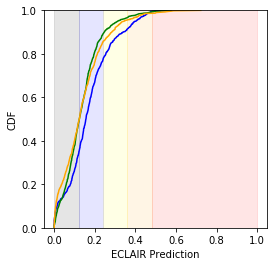

In [157]:
plt.figure(figsize=(4, 4))
sub_viral_preds = viral_preds[::len(viral_preds)/1000]
sub_human_preds = human_preds[::len(human_preds)/1000]
sub_human_human_preds = human_human_preds[::len(human_human_preds)/1000]
viral_percentiles = [(i+1)/float(len(sub_viral_preds)) for i in range(len(sub_viral_preds))]
human_percentiles = [(i+1)/float(len(sub_human_preds)) for i in range(len(sub_human_preds))]
human_human_percentiles = [(i+1)/float(len(sub_human_human_preds)) for i in range(len(sub_human_human_preds))]
plt.plot(sorted(sub_viral_preds), viral_percentiles, color="b")
plt.plot(sorted(sub_human_preds), human_percentiles, color="g")
plt.plot(sorted(sub_human_human_preds), human_human_percentiles, color="orange")
plt.fill_betweenx([-1, 3], [0.12, 0.12], x2=0, color="k", alpha=0.1)
plt.fill_betweenx([-1, 3], [0.24, 0.24], x2=0.12, color="blue", alpha=0.1)
plt.fill_betweenx([-1, 3], [0.36, 0.36], x2=0.24, color="yellow", alpha=0.1)
plt.fill_betweenx([-1, 3], [0.48, 0.48], x2=0.36, color="orange", alpha=0.1)
plt.fill_betweenx([-1, 3], [1, 1], x2=0.48, color="red", alpha=0.1)
plt.plot(y=[-1, 3], x=[0.12, 0.12], color="blue", linestyle="--")
plt.plot(y=[-1, 3], x=[0.24, 0.24], color="yellow", linestyle="--")
plt.plot(y=[-1, 3], x=[0.36, 0.36], color="orange", linestyle="--")
plt.plot(y=[-1, 3], x=[0.48, 0.48], color="red", linestyle="--")
plt.xlabel("ECLAIR Prediction")
plt.ylabel("CDF")
plt.ylim(0, 1)
plt.savefig("d.svg")

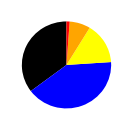

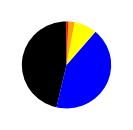

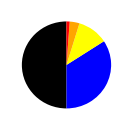

In [158]:
for i, dataset in enumerate([viral_preds, human_preds, human_human_preds]):
    vl = sum(dataset < 0.12)
    l = sum((0.12 <= dataset) & (dataset < 0.24))
    m = sum((0.24 <= dataset) & (dataset < 0.36))
    h = sum((0.36 <= dataset) & (dataset < 0.48))
    vh = sum(0.48 <= dataset)
    plt.figure(figsize=(2, 2))
    plt.pie([vl, l, m, h, vh], startangle=90, colors=["k", "blue", "yellow", "orange", "red"])
    plt.savefig("e{0}.svg".format(i))
    plt.show()

In [159]:
viral_interface_sizes = []
human_interface_sizes = []
for g in eclair_preds.groupby(["P1", "P2"]):
    viral_interface_sizes.append(len(g[1][(g[1]["Prot"] == 0)&(g[1]["Pred"] >= 0.36)]))
    human_interface_sizes.append(len(g[1][(g[1]["Prot"] == 1)&(g[1]["Pred"] >= 0.36)]))

human_human_interface_sizes = []
for g in all_eclair_preds.groupby(["P1", "P2"]):
    human_human_interface_sizes.append(len(g[1][(g[1]["Prot"] == 0)&(g[1]["Pred"] >= 0.36)]))
    if(not g[0][0] == g[0][1]):
        human_human_interface_sizes.append(len(g[1][(g[1]["Prot"] == 1)&(g[1]["Pred"] >= 0.36)]))

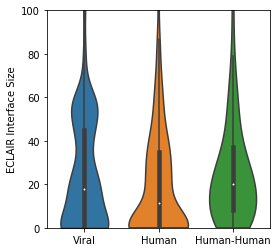

In [160]:
plt.figure(figsize=(4, 4))
sn.violinplot(data=[viral_interface_sizes, human_interface_sizes, human_human_interface_sizes], cut=0)
plt.ylim(0, 100)
plt.ylabel("ECLAIR Interface Size")
plt.xticks([0, 1, 2], ["Viral", "Human", "Human-Human"])
plt.savefig("f.svg")

In [161]:
ires_df = pd.read_csv("../../Data/Interface_Summary.txt", sep="\t")
ires_df = ires_df[ires_df["Source"] == "Docking"]

In [162]:
viral_docked_ires_sizes = ires_df["P1_Ires"].map(lambda x: len(x.split(",")) if type(x) == str else 0).values
human_docked_ires_sizes = ires_df["P2_Ires"].map(lambda x: len(x.split(",")) if type(x) == str else 0).values

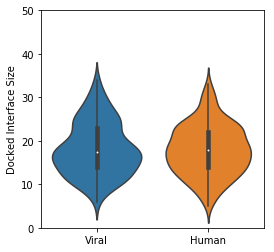

In [163]:
plt.figure(figsize=(4, 4))
sn.violinplot(data=[viral_docked_ires_sizes, human_docked_ires_sizes])
plt.ylim(0, 50)
plt.ylabel("Docked Interface Size")
plt.xticks([0, 1], ["Viral", "Human"])
plt.savefig("g.svg")

In [167]:
viral_docked_ires_sizes.mean()

18.164000000000001

In [168]:
human_docked_ires_sizes.mean()

17.931999999999999

In [169]:
sum(human_docked_ires_sizes)

4483